#### HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. After the recent project that included a lot of awareness drives and funding programmes, they have been able to raise around 10 million dollars. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. How will you help this NGO to make a correct decision based on socio-economic and health factors

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# reading the dataset
df=pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.shape

(167, 10)

In [4]:
df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

### Preprocessing

In [5]:
# Checking for null values
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

There are no null values present in the dataset

In [6]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


The huge variation in values across the parameters confirm presence of outliers. But it can be ignored since it is characteristic of each country and is best unaltered for proper analysis

In [7]:
# setting country name as index
df.set_index('country',inplace=True)
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [8]:
# Feature engineering 
# adding new column balance of trade by combining exports and imports and removing them
df1=df.copy()
df['balance_of_trade']=df['exports']-df['imports']
df.drop(columns=['exports','imports'],inplace=True)
df.head()

,child_mort,health,income,inflation,life_expec,total_fer,gdpp,balance_of_trade
country,,,,,,,,
Afghanistan,90.2,7.58,1610,9.44,56.2,5.82,553,-34.9
Albania,16.6,6.55,9930,4.49,76.3,1.65,4090,-20.6
Algeria,27.3,4.17,12900,16.10,76.5,2.89,4460,7.0
Angola,119.0,2.85,5900,22.40,60.1,6.16,3530,19.4
Antigua and Barbuda,10.3,6.03,19100,1.44,76.8,2.13,12200,-13.4


In [9]:
# statistics before scaling
df.describe()

,child_mort,health,income,inflation,life_expec,total_fer,gdpp,balance_of_trade
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,6.815689,17144.688623,7.781832,70.555689,2.947964,12964.155689,-5.781239
std,40.328931,2.746837,19278.067698,10.570704,8.893172,1.513848,18328.704809,18.942578
min,2.600000,1.810000,609.000000,-4.210000,32.100000,1.150000,231.000000,-73.500000
25%,8.250000,4.920000,3355.000000,1.810000,65.300000,1.795000,1330.000000,-14.850000
50%,19.300000,6.320000,9960.000000,5.390000,73.100000,2.410000,4660.000000,-4.800000
75%,62.100000,8.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000,3.850000
max,208.000000,17.900000,125000.000000,104.000000,82.800000,7.490000,105000.000000,39.400000


In [10]:
# Scaling of data
from sklearn.preprocessing import MinMaxScaler
mm_scale=MinMaxScaler(feature_range=(0,1))
df_std=mm_scale.fit_transform(df)
df=pd.DataFrame(df_std,columns = df.columns,index=df.index)
# basic column statistics after scaling
df.describe()

,child_mort,health,income,inflation,life_expec,total_fer,gdpp,balance_of_trade
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,0.173661,0.311106,0.132933,0.110820,0.758495,0.283591,0.121536,0.599812
std,0.196343,0.170717,0.154980,0.097687,0.175408,0.238777,0.174944,0.167782
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.027507,0.193288,0.022076,0.055633,0.654832,0.101735,0.010490,0.519486
50%,0.081305,0.280298,0.075174,0.088716,0.808679,0.198738,0.042274,0.608503
75%,0.289679,0.422001,0.178397,0.138250,0.881657,0.430599,0.131900,0.685120
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df2=df.copy()

<AxesSubplot:>

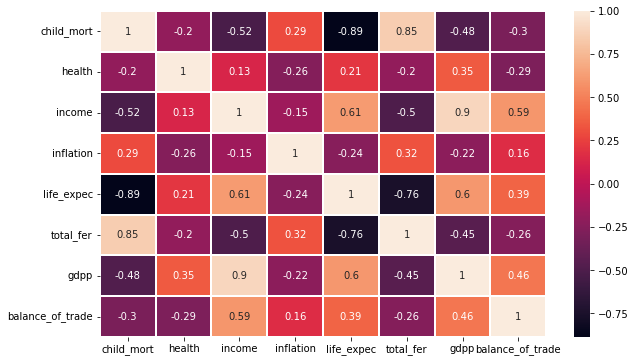

In [12]:
# checking correlation between the features
plt.figure(figsize=(10,6))
sns.heatmap(data=df.corr(),annot=True,linewidth=0.2)

High positive correlation can be observed for gdp and income and high negative correlation can be observed for life expectancy and child mortality

In [13]:
df.columns

Index(['child_mort', 'health', 'income', 'inflation', 'life_expec',
       'total_fer', 'gdpp', 'balance_of_trade'],
      dtype='object')

Among the features there can be 2 classifications; one where the increase in that factor is good for the country (eg: 'health', 'income', 'life_expec', 'gdpp', 'balance_of_trade') and other where the decrease in that factor is good for the country(eg: 'child_mort', 'inflation', 'total_fer')

In [14]:
# separating out the two classes of features
lower_the_better=df.drop(columns=['health','income','life_expec','gdpp','balance_of_trade'])
lower_the_better.head()

,child_mort,inflation,total_fer
country,,,
Afghanistan,0.426485,0.126144,0.736593
Albania,0.068160,0.080399,0.078864
Algeria,0.120253,0.187691,0.274448
Angola,0.566699,0.245911,0.790221
Antigua and Barbuda,0.037488,0.052213,0.154574


In [15]:
higher_the_better=df.drop(columns=['child_mort','inflation','total_fer'])
higher_the_better.head()

,health,income,life_expec,gdpp,balance_of_trade
country,,,,,
Afghanistan,0.358608,0.008047,0.475345,0.003073,0.341895
Albania,0.294593,0.074933,0.871795,0.036833,0.468556
Algeria,0.146675,0.098809,0.875740,0.040365,0.713020
Angola,0.064636,0.042535,0.552268,0.031488,0.822852
Antigua and Barbuda,0.262275,0.148652,0.881657,0.114242,0.532329


In [16]:
# Performing principal component analysis on the each class of features and combining them into a single component
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
pca.fit(lower_the_better)
l_pca = pca.transform(lower_the_better)
l_pca.shape

(167, 1)

In [17]:
pca.fit(higher_the_better)
h_pca = pca.transform(higher_the_better)
h_pca.shape

(167, 1)

Text(0, 0.5, 'higher_the_better Principal Component')

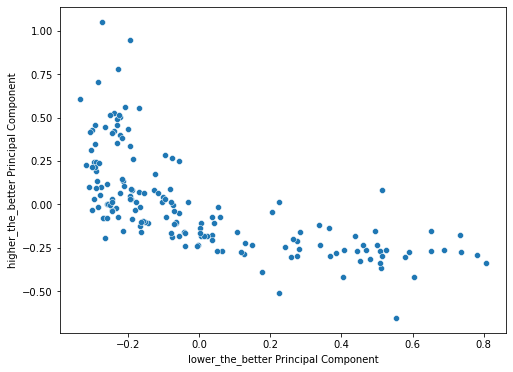

In [18]:
# plotting the PCA components
plt.figure(figsize =(8, 6))
sns.scatterplot(x=l_pca[:, 0], y=h_pca[:, 0],data=df)
plt.xlabel('lower_the_better Principal Component')
plt.ylabel('higher_the_better Principal Component')

The plot shows the distribution of countries as per the principal component analysis components. We need to cluster the given data set in the best possible manner so that the cluster of countries with poor economy can be identified. From the graph we can say that the countries towards the bottom right side are the aid deserving countries 

In [19]:
# converting the principal component analysis arrays to columns and merging them to a single dataframe
hdf = pd.DataFrame(h_pca, columns =['higher_better_pca'],index=df.index)
ldf = pd.DataFrame(l_pca, columns =['lower_better_pca'],index=df.index)
df=pd.concat([ldf, hdf], axis=1)
df.head()

,lower_better_pca,higher_better_pca
country,,
Afghanistan,0.510382,-0.363297
Albania,-0.227936,-0.074846
Algeria,-0.031310,0.013198
Angola,0.652416,-0.150442
Antigua and Barbuda,-0.191199,0.031477


### Clustering algorithms

#### K-means clustering

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


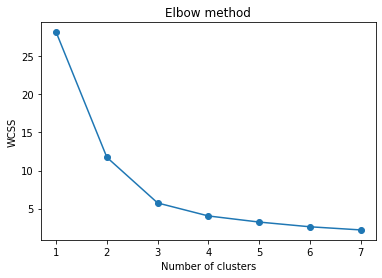

In [20]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,8):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
# Elbow method to determine the apt number of clusters
plt.plot(range(1,8),wcss,'-o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Based on the above elbow method we can choose 3 as the optimum number of clusters

In [21]:
# K-means with 3 clusters
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(df)
from sklearn import metrics
print('silhouette_score: ',metrics.silhouette_score(df, y_kmeans, metric='euclidean'))
print('davies_bouldin_score: ',metrics.davies_bouldin_score(df, y_kmeans))
km_three=pd.DataFrame(y_kmeans, columns =['cluster'],index=df.index)
print(km_three.value_counts())

silhouette_score:  0.5315023445504463
davies_bouldin_score:  0.5939533486860594
cluster
0          83
1          47
2          37
dtype: int64


Text(0, 0.5, 'higher_the_better Principal Component')

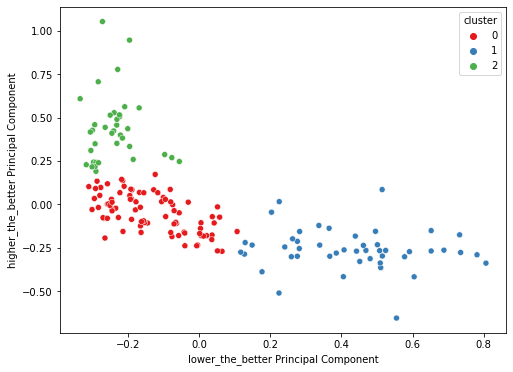

In [23]:
#Plotting the clustering using k-means
plt.figure(figsize =(8, 6))
df_kclustered=pd.concat([df,km_three],axis=1)
sns.scatterplot(x=df_kclustered['lower_better_pca'], y=df_kclustered['higher_better_pca'],data=df_kclustered,hue='cluster',legend='full',palette="Set1")
plt.xlabel('lower_the_better Principal Component')
plt.ylabel('higher_the_better Principal Component')

As per the above plot we can see that the cluster-1 in blue are the 47 countries in need of aid

In [25]:
df_kclustered[df_kclustered['cluster']==1]

,lower_better_pca,higher_better_pca,cluster
country,,,
Afghanistan,0.510382,-0.363297,1
Angola,0.652416,-0.150442,1
Benin,0.507437,-0.265800,1
Burkina Faso,0.591325,-0.271690,1
Burundi,0.577627,-0.300840,1
Cameroon,0.468818,-0.264369,1
Central African Republic,0.604493,-0.416271,1
Chad,0.781487,-0.289450,1
Comoros,0.367166,-0.297894,1


#### Agglomerative heirarchical clustering

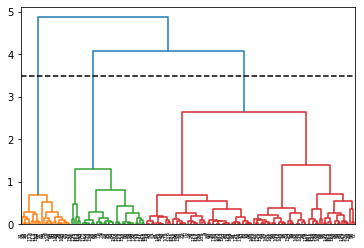

In [26]:
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import AgglomerativeClustering
# Using dendrogram to find the optimum number of clusters
ward_link = linkage(df, method='ward',metric='euclidean')
dendrogram(ward_link)
plt.hlines(3.5,0,5000,colors='black',linestyles='dashed' )
plt.show()

From the above dendrogram the optimum number of clusters can be concluded as 3

In [27]:
# agglomerative heirarchical clustering with 3 clusters
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels=cluster.fit_predict(df)
print('silhouette_score: ',metrics.silhouette_score(df, labels, metric='euclidean'))
print('davies_bouldin_score: ',metrics.davies_bouldin_score(df, labels))
ah_three=pd.DataFrame(labels, columns =['cluster'],index=df.index)
print(ah_three.value_counts())

silhouette_score:  0.4403821130055186
davies_bouldin_score:  0.6174494427560776
cluster
0          105
2           37
1           25
dtype: int64


Text(0, 0.5, 'higher_the_better Principal Component')

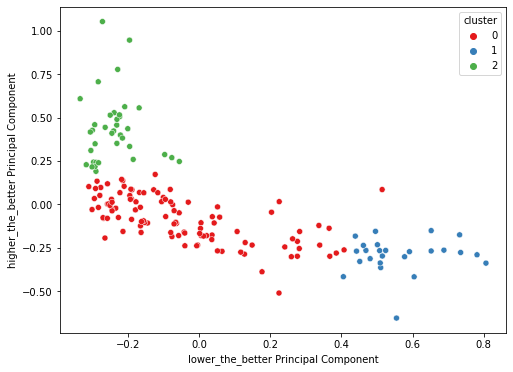

In [29]:
# Scatter plot to visualize the clusters
plt.figure(figsize =(8, 6))
df_hclustered=pd.concat([df,ah_three],axis=1)
sns.scatterplot(x=df_hclustered['lower_better_pca'], y=df_hclustered['higher_better_pca'],data=df_hclustered,hue='cluster',legend='full',palette="Set1")
plt.xlabel('lower_the_better Principal Component')
plt.ylabel('higher_the_better Principal Component')

As per the above plot we can see that the cluster-1 in blue are the 25 countries in need of aid

In [30]:
df_hclustered[df_hclustered['cluster']==1]

,lower_better_pca,higher_better_pca,cluster
country,,,
Afghanistan,0.510382,-0.363297,1
Angola,0.652416,-0.150442,1
Benin,0.507437,-0.265800,1
Burkina Faso,0.591325,-0.271690,1
Burundi,0.577627,-0.300840,1
Cameroon,0.468818,-0.264369,1
Central African Republic,0.604493,-0.416271,1
Chad,0.781487,-0.289450,1
"Congo, Dem. Rep.",0.688337,-0.262933,1


On comparing the silhouette_score and davies_bouldin_score for both k-means and agglomerative clustering we can conclude that the k-means clustering is the better clustering algorithm with higher silhouette_score of 0.53 and lower davies_bouldin_score of 0.59 when compared to agglomerative clustering(silhouette_score:  0.44 and davies_bouldin_score:  0.62)

Based on k-means clustering below 47 countries are under cluster-1

In [31]:
df_kclustered[df_kclustered['cluster']==1]

,lower_better_pca,higher_better_pca,cluster
country,,,
Afghanistan,0.510382,-0.363297,1
Angola,0.652416,-0.150442,1
Benin,0.507437,-0.265800,1
Burkina Faso,0.591325,-0.271690,1
Burundi,0.577627,-0.300840,1
Cameroon,0.468818,-0.264369,1
Central African Republic,0.604493,-0.416271,1
Chad,0.781487,-0.289450,1
Comoros,0.367166,-0.297894,1


Text(0, 0.5, 'higher_the_better Principal Component')

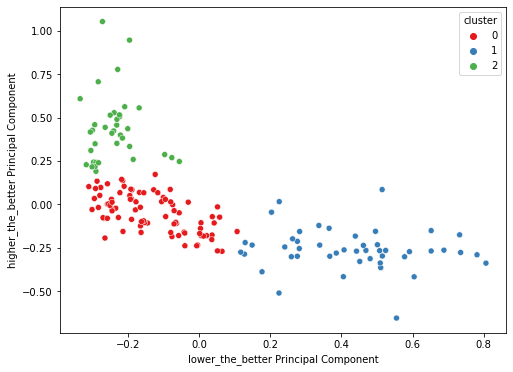

In [32]:
plt.figure(figsize =(8, 6))
sns.scatterplot(x=df_kclustered['lower_better_pca'], y=df_kclustered['higher_better_pca'],data=df_kclustered,hue='cluster',legend='full',palette="Set1")
plt.xlabel('lower_the_better Principal Component')
plt.ylabel('higher_the_better Principal Component')

Inorder to further minimise the number of countries under cluster-1 we can choose those countries from above plot which are more toward the bottom right of cluster-1

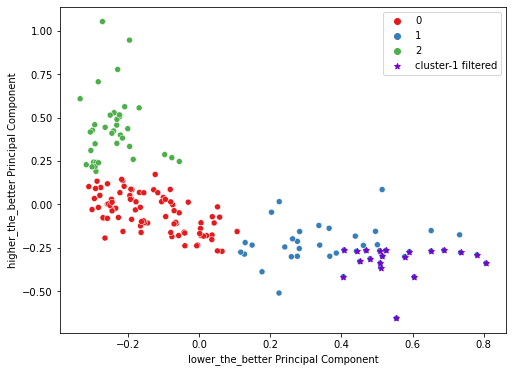

In [41]:
plt.figure(figsize =(8, 6))
sns.scatterplot(x=df_kclustered['lower_better_pca'], y=df_kclustered['higher_better_pca'],data=df_kclustered,hue='cluster',legend='full',palette="Set1")
plt.xlabel('lower_the_better Principal Component')
plt.ylabel('higher_the_better Principal Component')
df_filtered = df_kclustered[(df_kclustered['higher_better_pca']<-0.25) & (df_kclustered['lower_better_pca'] >0.4)]
plt.scatter(df_filtered['lower_better_pca'],df_filtered['higher_better_pca'],color='#7800CF',marker='*',label='cluster-1 filtered')
plt.legend()

The purple highlighted countries under cluster-1 are most likely to be the ones in dire need of humanitarian aid

In [45]:
df_filtered['cluster']

country
Afghanistan                 1
Benin                       1
Burkina Faso                1
Burundi                     1
Cameroon                    1
Central African Republic    1
Chad                        1
Congo, Dem. Rep.            1
Guinea                      1
Guinea-Bissau               1
Haiti                       1
Liberia                     1
Malawi                      1
Mali                        1
Mozambique                  1
Niger                       1
Sierra Leone                1
Tanzania                    1
Uganda                      1
Zambia                      1
Name: cluster, dtype: int32